In [1]:
from sklearn import linear_model
import sklearn as sk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
salary = pd.read_csv("Salary.csv")
salary

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


In [3]:
col_names = []
for columns in salary.columns:
    col_names.append(columns)

In [4]:
predictor = salary[col_names[0]].values
predictor = np.expand_dims(predictor, axis=1)

response = salary[col_names[1]].values

In [5]:
model = linear_model.LinearRegression()

In [6]:
x_train, x_test, y_train, y_test = sk.model_selection.train_test_split(
    predictor,
    response,
    test_size = 0.3
)

In [7]:
model.fit(x_train, y_train)

LinearRegression()

In [8]:
y_predict = model.predict(x_test)
y_predict

array([110906.94964918,  43480.45753369, 127763.57267805,  68765.392077  ,
        65394.06747123,  97421.65122608,  73822.37898566,  47694.61329091,
        81407.85934865, 104164.30043763, 117649.59886073])

In [9]:
print("Model coefficient:", model.coef_[0])
print("Model intercept:", model.intercept_)
print("Model R2_score:", sk.metrics.r2_score(y_test, y_predict))

Model coefficient: 8428.311514435829
Model intercept: 30837.99026203985
Model R2_score: 0.9536732443777072


In [10]:
true_resp = y_test.tolist()
pred_resp = y_predict.tolist()

In [11]:
dict = {
    "true_resp" : true_resp,
    "pred_resp" : pred_resp
}

In [12]:
comparison = pd.DataFrame.from_dict(dict)
comparison

,true_resp,pred_resp
0,116969,110906.949649
1,37731,43480.457534
2,126756,127763.572678
3,61111,68765.392077
4,57081,65394.067471
5,101302,97421.651226
6,66029,73822.378986
7,43525,47694.613291
8,93940,81407.859349
9,109431,104164.300438


<AxesSubplot:>

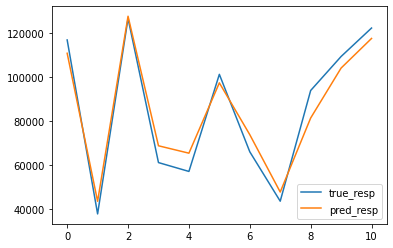

In [13]:
comparison.plot()

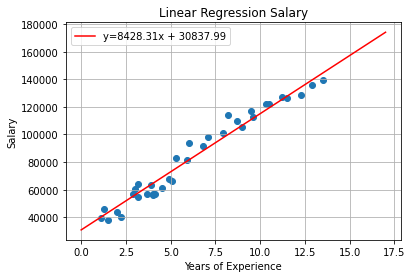

In [14]:
x = np.linspace(0, 17, 50)
y = model.coef_[0] * x + model.intercept_
plt.plot(x, y, "r", label=f"y={model.coef_[0]:.2f}x + {model.intercept_:.2f}")
plt.scatter(predictor, response)
plt.title("Linear Regression Salary")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.legend()
plt.grid()
plt.show()